# Pymaceuticals Inc.
---

It is important to recognize the signnificance in correlation between the weight of mice undergoing the study and their average tumor size. Increased weight yielded larger tumor size. However, using Pymaceutical's drug of interest, Capomulin against other drug regimens, provided positive results. Capomulin had a greater positive effect in decreasing the tumor size in comparison to other drug regimens, followed by a drug named Ramicane which also had a significant positive effect. In summary, tumor development was significantly reduced in size over the course of 45 days when using a drug regimen-Capomulin.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
merge_df

# Display the data table for preview
merge_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [83]:
# Checking the number of mice.
number_of_mice= merge_df["Mouse ID"].nunique()
number_of_mice

249

In [18]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data =  merge_df.loc[merge_df["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data= merge_df[merge_df["Mouse ID"].isin(duplicate_mice) == False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [113]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats=clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
summary_stats.columns=["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std.Dev.","Tumor Volume Std.Err."]
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [90]:

regimen_count= clean_data["Drug Regimen"].count()
regimen_count


1880

## Bar and Pie Charts

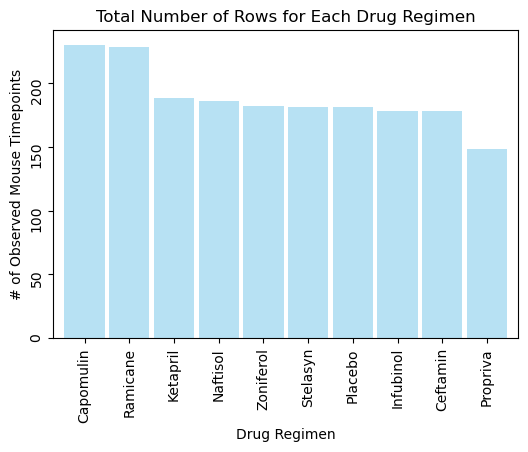

In [116]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count= clean_data["Drug Regimen"].value_counts()

regimen_count.plot(kind= 'bar', color= 'skyblue', figsize=(6,4),alpha=0.6, width=0.9)
plt.yticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows for Each Drug Regimen")
plt.show()


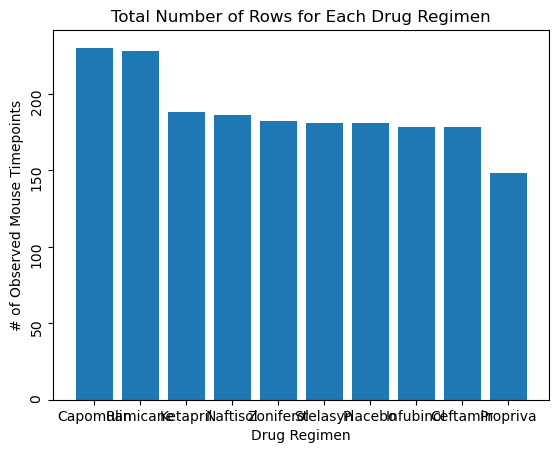

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_count= clean_data["Drug Regimen"].value_counts()

plt.bar(regimen_count.index.values, regimen_count.values)
plt.yticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows for Each Drug Regimen")
plt.show()



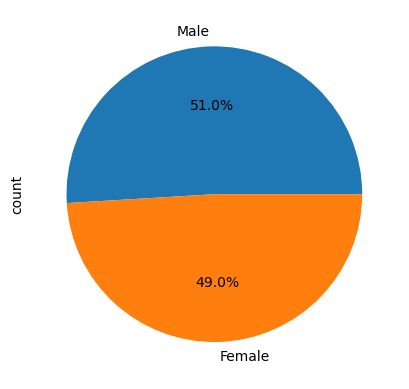

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count = clean_data["Sex"].value_counts()
count.plot(kind = "pie", autopct = '%1.1f%%')
plt.show()


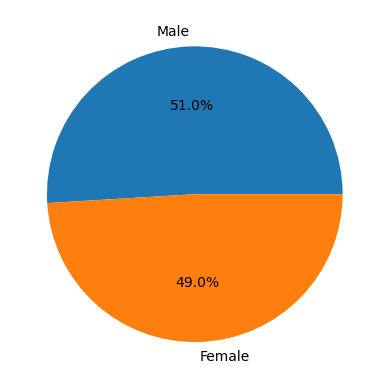

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = clean_data["Sex"].value_counts()
plt.pie(count, labels= count.index, autopct ='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [118]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_data,on=["Mouse ID","Timepoint"], how="left")


In [133]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]
for x in treatments: 
    tumor_volume = merged_data.loc[merged_data["Drug Regimen"]==x, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volume)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    tumor_vol = tumor_volume.quantile([0.25, 0.50, 0.75])
    q1= tumor_vol[0.25]
    q3= tumor_vol[0.75]
    iqr=q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound)|(tumor_volume > upper_bound)]
    print(f'{x} outliers: {outliers}')


    

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 

    # Determine outliers using upper and lower bounds


Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


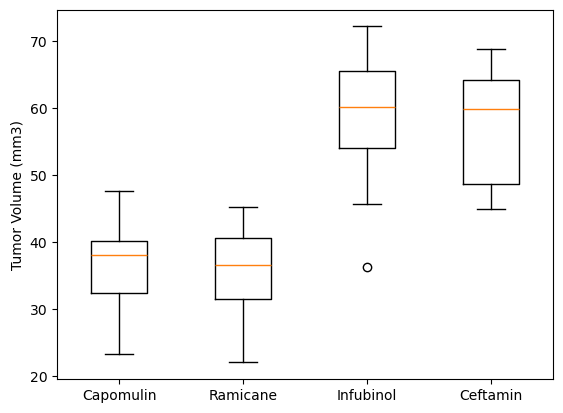

In [140]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels= treatments)
plt.ylabel("Tumor Volume (mm3)")
plt.show()


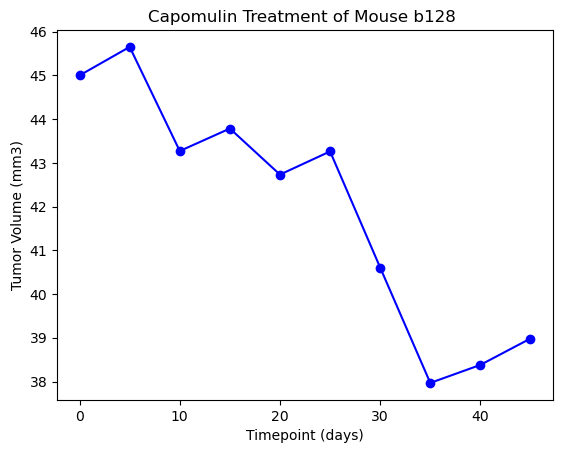

In [20]:
#Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_data.loc[clean_data["Mouse ID"]=="b128"]
plt.plot (capomulin_mouse["Timepoint"],capomulin_mouse ["Tumor Volume (mm3)"], marker="o",color="blue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128 ")
plt.show()

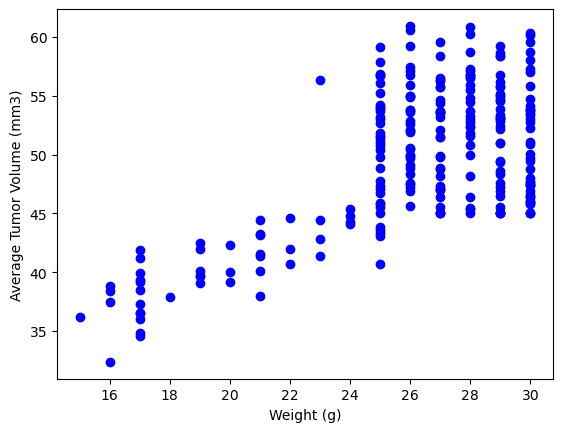

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mouse = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]

avg_capomulin_vol =clean_data.groupby(["Mouse ID"])[["Tumor Volume (mm3)", "Weight (g)"]].mean()

plt.scatter(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol ["Tumor Volume (mm3)"], marker="o",facecolors="blue")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

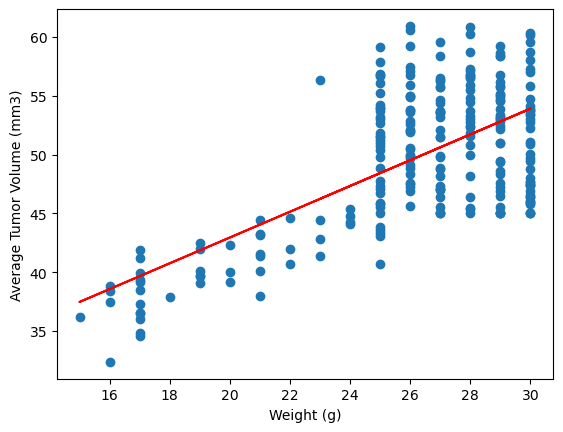

In [208]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol['Tumor Volume (mm3)'])[0],2)
model = st.linregress(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol['Tumor Volume (mm3)'])

y_values = avg_capomulin_vol["Weight (g)"]*model[0]+model[1]
plt.scatter(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol['Tumor Volume (mm3)'])
plt.plot(avg_capomulin_vol["Weight (g)"],y_values,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
